<a href="https://colab.research.google.com/github/LIZKA30/ML_2025_autumn/blob/main/Lab4_%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0_%D0%95%D0%BB%D0%B8%D0%B7%D0%B0%D0%B2%D0%B5%D1%82%D0%B0_%D0%9D%D0%9F%D0%9C%D0%91%D0%94_01_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
import numpy as np

def max_element(x):
    if not np.any(x == 0):
        return None
    after_zero = x[1:][x[:-1] == 0]
    return None if after_zero.size == 0 else np.max(after_zero)

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))

5


In [ ]:
#2
import numpy as np

def nearest_element(X, v):
    idx = np.argmin(np.abs(X - v))
    return X.flat[idx]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print(nearest_element(X, v))

4


In [ ]:
#3
import numpy as np

def scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std_safe = np.where(std == 0, 1, std)
    return (X - mean) / std_safe

X = np.random.randint(0, 10, size=(4, 3))
print("Исходная матрица:\n", X)
print("Масштабированная матрица:\n", scale(X))

Исходная матрица:
 [[2 1 7]
 [7 0 7]
 [6 3 5]
 [8 3 4]]
Масштабированная матрица:
 [[-1.6464639  -0.57735027  0.96225045]
 [ 0.5488213  -1.34715063  0.96225045]
 [ 0.10976426  0.96225045 -0.57735027]
 [ 0.98787834  0.96225045 -1.34715063]]


In [ ]:
#4
import numpy as np

def get_stats(X):
    det = np.linalg.det(X)
    trace = np.trace(X)
    min_el = np.min(X)
    max_el = np.max(X)
    frob_norm = np.linalg.norm(X, 'fro')
    eigenvalues = np.linalg.eigvals(X)

    inv_matrix = np.linalg.inv(X) if not np.isclose(det, 0) else None

    return {
        "determinant": det,
        "trace": trace,
        "min": min_el,
        "max": max_el,
        "frobenius_norm": frob_norm,
        "eigenvalues": eigenvalues,
        "inverse_matrix": inv_matrix
    }

X = np.random.normal(10, 1, size=(4, 4))
stats = get_stats(X)

keys = np.array(list(stats.keys()))
vals = np.array(list(stats.values()), dtype=object)

lines = np.char.add(np.char.add(keys.astype(str), ": "), np.char.mod("%s", vals))
print("\n".join(lines))

determinant: -79.18628648452105
trace: 35.3691094959075
min: 7.875956997089748
max: 11.19877717762617
frobenius_norm: 38.91939850575535
eigenvalues: [38.67659515+0.j         -2.42360473+0.j         -0.44194046+0.80589173j
 -0.44194046-0.80589173j]
inverse_matrix: [[-0.17238812 -0.19967442  0.60999594 -0.2521735 ]
 [-0.27014543  0.64690247 -1.17971868  0.94636929]
 [-0.10907272  0.75563622 -0.8602012   0.32898688]
 [ 0.58579281 -1.20696901  1.52136253 -1.04736044]]


In [ ]:
#5
import numpy as np

def experiment_stats(n_experiments=100, size=10):
    A = np.random.randn(n_experiments, size, size)
    B = np.random.randn(n_experiments, size, size)

    C = np.matmul(A, B)

    max_elements = np.max(C, axis=(1, 2))

    mean_val = np.mean(max_elements)
    quantile_95 = np.quantile(max_elements, 0.95)

    return mean_val, quantile_95

mean_val, q95 = experiment_stats()
print(f"Среднее значение максимальных элементов: {mean_val:.4f}")
print(f"95%-квантиль: {q95:.4f}")

Среднее значение максимальных элементов: 8.1714
95%-квантиль: 10.8916


In [48]:
import pandas as pd
import numpy as np

data = pd.read_csv("2008.csv")

display(data.head())

print("Размер таблицы:", data.shape)

print("\nПропуски в данных:")
display(data.isna().sum().sort_values(ascending=False).head(10))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Размер таблицы: (70000, 29)

Пропуски в данных:


,0
CancellationCode,68589
NASDelay,54747
LateAircraftDelay,54747
WeatherDelay,54747
CarrierDelay,54747
SecurityDelay,54747
AirTime,1582
ArrDelay,1582
ActualElapsedTime,1582
ArrTime,1556


In [49]:
#6
def most_common_cancellation_reason(df):
    cancelled = df[df["Cancelled"] == 1]

    most_common = cancelled["CancellationCode"].value_counts().idxmax()
    count = cancelled["CancellationCode"].value_counts().max()

    return most_common, count

code, count = most_common_cancellation_reason(data)
print(f"Наиболее частая причина отмены: {code} (встречается {count} раз)")

reason_map = {
    "A": "Carrier (авиаперевозчик)",
    "B": "Weather (погода)",
    "C": "NAS (национальная система воздушного движения)",
    "D": "Security (безопасность)"
}

print(f"Расшифровка: {reason_map.get(code, 'Неизвестно')}")

Наиболее частая причина отмены: A (встречается 563 раз)
Расшифровка: Carrier (авиаперевозчик)


In [50]:
#7
mean_d, min_d, max_d = data["Distance"].agg(["mean", "min", "max"])
print(f" Среднее: {mean_d:.2f}\n Минимальное: {min_d}\n Максимальное: {max_d}")

 Среднее: 724.51
 Минимальное: 31.0
 Максимальное: 4962.0


In [51]:
#8
min_distance = data['Distance'].min()
print(f"Минимальное расстояние: {min_distance} миль\n")

min_distance_flights = data[data['Distance'] == min_distance]
print("Рейсы с минимальным расстоянием:")
display(min_distance_flights[['Year','Month','DayofMonth','FlightNum','Origin','Dest','Distance']])

min_distance_flights = data[data['Distance'] == min_distance]
print(f"Количество рейсов с минимальным расстоянием: {len(min_distance_flights)}\n")

flight_nums = min_distance_flights['FlightNum'].unique()
other_days_distances = data[(data['FlightNum'].isin(flight_nums)) & (data['Distance'] != min_distance)]
print("\nЭти же рейсы в другие дни (расстояние):")
display(other_days_distances[['Year','Month','DayofMonth','FlightNum','Origin','Dest','Distance']])

Минимальное расстояние: 31 миль

Рейсы с минимальным расстоянием:


,Year,Month,DayofMonth,FlightNum,Origin,Dest,Distance
1116,2008,12,30,65,WRG,PSG,31
6958,2008,12,26,65,WRG,PSG,31
17349,2008,8,18,64,PSG,WRG,31
27534,2008,3,11,64,PSG,WRG,31
46082,2008,8,9,65,WRG,PSG,31
48112,2008,2,28,64,PSG,WRG,31


Количество рейсов с минимальным расстоянием: 6


Эти же рейсы в другие дни (расстояние):


,Year,Month,DayofMonth,FlightNum,Origin,Dest,Distance
501,2008,3,20,64,ATL,IAD,533
1389,2008,3,13,64,KTN,SEA,680
1517,2008,7,10,65,SEA,KTN,680
2619,2008,5,23,64,LAS,BOS,2381
3869,2008,7,1,64,WRG,KTN,82
...,...,...,...,...,...,...,...
66529,2008,12,21,65,KTN,WRG,82
67172,2008,3,22,64,ATL,IAD,533
68264,2008,9,7,65,SJC,LAS,386
68338,2008,8,3,65,EWR,LAX,2454


In [52]:
#9
departure_counts = data['Origin'].value_counts()

top_airport = departure_counts.idxmax()
top_count = departure_counts.max()

print(f"Аэропорт с наибольшим количеством вылетов: {top_airport} ({top_count} вылетов)")

Аэропорт с наибольшим количеством вылетов: ATL (4134 вылетов)


ATL — это Hartsfield–Jackson Atlanta International Airport, аэропорт в Атланте, штат Джорджия, США.

In [53]:
#10
avg_airtime_by_airport = data.groupby('Origin')['AirTime'].mean()

max_airport = avg_airtime_by_airport.idxmax()
max_airtime = avg_airtime_by_airport.max()

print(f"Аэропорт с наибольшим средним временем полета: {max_airport} ({max_airtime:.2f} минут)")

Аэропорт с наибольшим средним временем полета: SJU (205.20 минут)


In [54]:
#11
delay_ratio_by_airport = (
    data.groupby('Origin')
        .filter(lambda x: len(x) >= 1000)
        .groupby('Origin')['DepDelay']
        .apply(lambda x: (x > 0).mean())
)

max_delay_airport = delay_ratio_by_airport.idxmax()
max_delay_ratio = delay_ratio_by_airport.max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_delay_airport} ({max_delay_ratio:.2%})")

Аэропорт с наибольшей долей задержанных рейсов: EWR (51.12%)


In [55]:
#12
has_na = data.isna().any().any()
print(f"В данных есть пропущенные значения? {has_na}")

total_missing = data.isna().sum().sum()
print(f"Общее количество пропущенных элементов: {total_missing}")

rows_with_missing = data.isna().any(axis=1).sum()
print(f"Количество объектов с хотя бы одним пропуском: {rows_with_missing}")

columns_with_missing = data.isna().any(axis=0).sum()
print(f"Количество признаков с хотя бы одним пропуском: {columns_with_missing}")


В данных есть пропущенные значения? True
Общее количество пропущенных элементов: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с хотя бы одним пропуском: 16


In [56]:
missing_target = data['DepDelay'].isna().sum()
print(f"Пропущенных значений в целевой переменной: {missing_target}")

Пропущенных значений в целевой переменной: 1399


In [57]:
missing_target = data[data['DepDelay'].isna()]

columns_to_check = ['Cancelled', 'CancellationCode', 'Diverted', 'FlightNum', 'Origin', 'Dest', 'Distance']
display(missing_target[columns_to_check].head(10))

print("Распределение отмен и диверсий среди объектов с пропущенным DepDelay:")
print(missing_target[['Cancelled', 'Diverted']].value_counts())

cancelled_count = missing_target['Cancelled'].sum()
diverted_count = missing_target['Diverted'].sum()
total_missing = len(missing_target)

print(f"\nВсего объектов с пропущенным DepDelay: {total_missing}")
print(f"Из них отменённых рейсов: {cancelled_count}")
print(f"Из них диверсированных рейсов: {diverted_count}")

,Cancelled,CancellationCode,Diverted,FlightNum,Origin,Dest,Distance
11,1,B,0,484,DFW,MIA,1121
78,1,B,0,4772,ATL,CAK,528
103,1,A,0,816,BOS,BWI,370
112,1,B,0,1281,MDW,MSP,349
128,1,A,0,1251,DSM,ORD,299
194,1,C,0,753,CLE,ORD,316
204,1,A,0,5765,LGA,RDU,431
236,1,A,0,6151,EUG,DEN,997
257,1,A,0,1853,DFW,COS,592
267,1,A,0,2049,OAK,ONT,361


Распределение отмен и диверсий среди объектов с пропущенным DepDelay:
Cancelled  Diverted
1          0           1399
Name: count, dtype: int64

Всего объектов с пропущенным DepDelay: 1399
Из них отменённых рейсов: 1399
Из них диверсированных рейсов: 0


**Причина пропусков:**

Основная причина — отмена рейса (Cancelled = 1) или диверсия/перенаправление рейса (Diverted = 1).

Для таких рейсов нет фактического времени вылета, поэтому значение задержки (DepDelay) отсутствует.

**Что объединяет эти объекты:**

Все эти рейсы не вылетели или не достигли запланированного аэропорта.

Они не могут иметь корректное значение задержки, поэтому их нельзя использовать для обучения модели, предсказывающей фактическую задержку.

**Исключение признаков:**

Признаки, напрямую отражающие отмену или диверсию (Cancelled, CancellationCode, Diverted), можно исключить, если мы убираем такие рейсы из выборки.

Их лучше исключить, чтобы модель обучалась на данных, которые реально влияют на задержку рейса, а не на факты отмены или диверсии.


In [80]:
filtered_data = data.dropna(subset=['DepDelay'])
filtered_data = filtered_data[filtered_data['DepDelay'] != 0]

X = filtered_data.drop(columns=['DepDelay', 'Cancelled', 'CancellationCode', 'Diverted'])
y = filtered_data['DepDelay']

print(f"Размер матрицы признаков: {X.shape}")
print(f"Размер вектора целевой переменной: {y.shape}")


Размер матрицы признаков: (63404, 25)
Размер вектора целевой переменной: (63404,)


In [81]:
#13
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

hours = X[time_features].floordiv(100)
minutes = X[time_features].mod(100)

hours = hours.mask(hours > 23, np.nan)
minutes = minutes.mask(minutes > 59, np.nan)

hour_cols = [f"{col}_Hour" for col in time_features]
minute_cols = [f"{col}_Minute" for col in time_features]

X[hour_cols] = hours
X[minute_cols] = minutes

X = X.drop(columns=time_features)

print(f"Новая форма X: {X.shape}")
print(f"Новые признаки: {[col for col in X.columns if 'Hour' in col or 'Minute' in col]}")



Новая форма X: (63404, 29)
Новые признаки: ['DepTime_Hour', 'CRSDepTime_Hour', 'ArrTime_Hour', 'CRSArrTime_Hour', 'DepTime_Minute', 'CRSDepTime_Minute', 'ArrTime_Minute', 'CRSArrTime_Minute']


In [90]:
#14

delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

arrival_columns = ['ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']

technical_columns = ['TailNum', 'Year', 'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay']

columns_to_remove = delay_columns + arrival_columns + technical_columns

columns_to_remove = [col for col in columns_to_remove if col in X.columns]

X_cleaned = X.drop(columns=columns_to_remove)

print("Исключенные признаки:", columns_to_remove)
print("Размерность матрицы признаков после удаления:", X_cleaned.shape)


Исключенные признаки: ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute', 'TailNum', 'Year', 'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay']
Размерность матрицы признаков после удаления: (63404, 15)


**Обоснование исключения признаков**

**TailNum** — по условию.

**Year** — по условию.

**ArrDelay** — задержка прибытия рейса.

Если оставить ArrDelay как признак для предсказания DepDelay, модель будет видеть фактическую задержку прибытия рейса, которая сильно коррелирует с задержкой вылета.

**ActualElapsedTime и CRSElapsedTim**e — фактическое и плановое время полета.

Эти признаки тесно связаны с задержкой рейса и могут вызвать переобучение модели, поэтому их лучше убрать.

**CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay** — причины задержек.

Они напрямую формируют DepDelay, оставлять их нельзя, иначе модель будет использовать будущую информацию.

**ArrTime_Hour, ArrTime_Minute, CRSArrTime_Hour, CRSArrTime_Minut**e — время прибытия рейса.

Косвенно отражает задержку вылета, поэтому тоже может привести к утечке данных, исключаем их.

<Axes: >

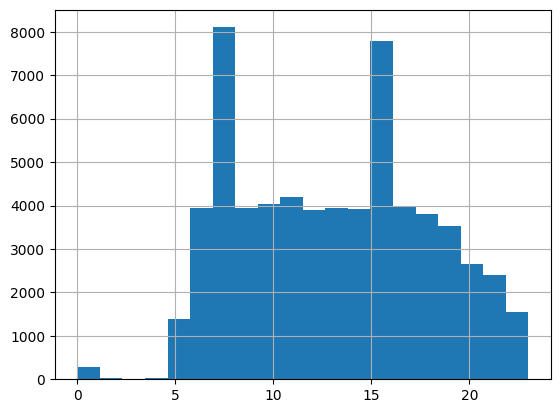

In [83]:
#15
X['DepTime_Hour'].hist(bins=20)

<Axes: >

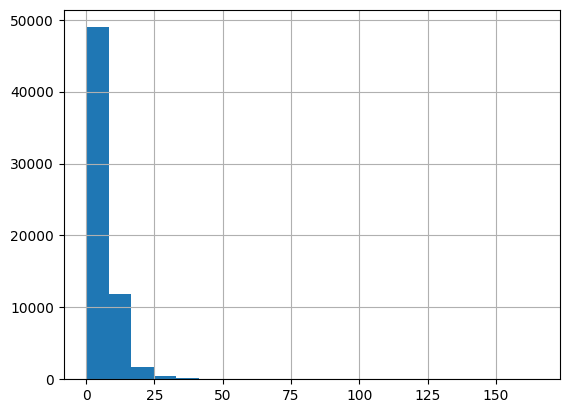

In [84]:
X['TaxiIn'].hist(bins=20)

<Axes: >

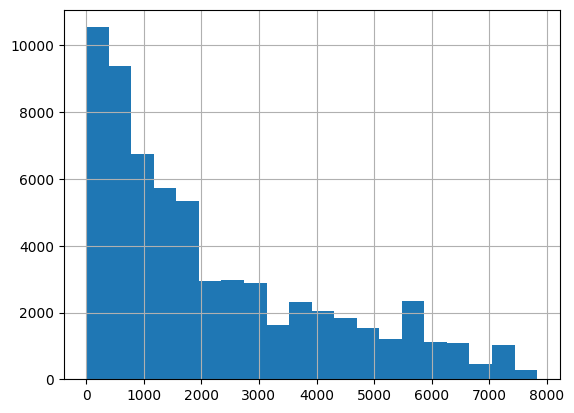

In [85]:
X['FlightNum'].hist(bins=20)

1. Признаки, такие как FlightNum или TaxiIn, имеют очень большие значения (сотни или тысячи), а DepTime_Hour — значения от 0 до 23.

   Если оставить их в таком виде, признаки с большим диапазоном будут доминировать при обучении линейной модели (коэффициенты будут подстраиваться под большие числа), а признаки с маленьким диапазоном почти не будут влиять на результат.

   Некоторые признаки имеют сильно скошенное распределение или концентрацию значений в определённом диапазоне.

2. Масштабирование (стандартизация через StandardScaler) приведёт все признаки к одинаковому масштабу: среднее = 0, стандартное отклонение = 1.

   Приводит все признаки к одинаковому масштабу, чтобы линейная модель корректно учитывала вклад каждого признака.

   Уменьшает влияние признаков с большими числовыми значениями на процесс оптимизации.

   Делает обучение модели более стабильным и ускоряет сходимость градиентных методов.

In [91]:
from sklearn.preprocessing import StandardScaler

def transform_data(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    df_numeric = df[numeric_cols].fillna(0)
    df_categorical = df[categorical_cols].fillna('nan')

    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric),
                             columns=numeric_cols, index=df.index)

    df_encoded = pd.get_dummies(df_categorical, drop_first=False)

    transformed_df = pd.concat([df_scaled, df_encoded], axis=1)

    return transformed_df


In [92]:
X_transformed = transform_data(X_cleaned)
print("Размерность матрицы признаков после преобразования:", X_transformed.shape)

Размерность матрицы признаков после преобразования: (63404, 626)


In [94]:
X_transformed = transform_data(X_cleaned)

print(f"Исходное количество признаков: {X_cleaned.shape[1]}")
print(f"После преобразования: {X_transformed.shape[1]} признаков")

Исходное количество признаков: 15
После преобразования: 626 признаков


In [97]:
#16
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,
    y,
    test_size=0.3,
    random_state=42
)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер контрольной выборки:", X_test.shape, y_test.shape)


Размер обучающей выборки: (44382, 626) (44382,)
Размер контрольной выборки: (19022, 626) (19022,)


In [99]:
#17
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_small = X_train[:1000]
y_train_small = y_train[:1000]

model = LinearRegression()

model.fit(X_train_small, y_train_small)

y_train_pred = model.predict(X_train_small)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train_small, y_train_pred)
r2_train = r2_score(y_train_small, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE на подвыборке (1000 объектов): {mse_train:.2f}")
print(f"R^2 на подвыборке (1000 объектов): {r2_train:.3f}")
print(f"MSE на контрольной выборке: {mse_test:.2f}")
print(f"R^2 на контрольной выборке: {r2_test:.3f}")

print("Коэффициенты линейной регрессии (первые 10 значений):")
print(model.coef_[:10])


MSE на подвыборке (1000 объектов): 662.76
R^2 на подвыборке (1000 объектов): 0.375
MSE на контрольной выборке: 1521.43
R^2 на контрольной выборке: -0.137
Коэффициенты линейной регрессии (первые 10 значений):
[-0.53958668  0.70072487  0.70466724  0.39577323 -2.39651776  3.34419373
  0.49712153  4.66091714 14.16328769 -5.97494589]


In [100]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)
print("Lasso Regression:")
print(f"MSE train: {mean_squared_error(y_train, lasso.predict(X_train)):.2f}, R² train: {r2_score(y_train, lasso.predict(X_train)):.3f}")
print(f"MSE test:  {mean_squared_error(y_test, lasso.predict(X_test)):.2f}, R² test:  {r2_score(y_test, lasso.predict(X_test)):.3f}")
print(f"Non-zero coefficients: {(lasso.coef_ != 0).sum()}\n")

ridge = Ridge(alpha=0.1, random_state=42, max_iter=10000)
ridge.fit(X_train, y_train)
print("Ridge Regression:")
print(f"MSE train: {mean_squared_error(y_train, ridge.predict(X_train)):.2f}, R² train: {r2_score(y_train, ridge.predict(X_train)):.3f}")
print(f"MSE test:  {mean_squared_error(y_test, ridge.predict(X_test)):.2f}, R² test:  {r2_score(y_test, ridge.predict(X_test)):.3f}")


Lasso Regression:
MSE train: 1156.18, R² train: 0.099
MSE test:  1211.15, R² test:  0.095
Non-zero coefficients: 26

Ridge Regression:
MSE train: 1132.14, R² train: 0.117
MSE test:  1212.58, R² test:  0.094


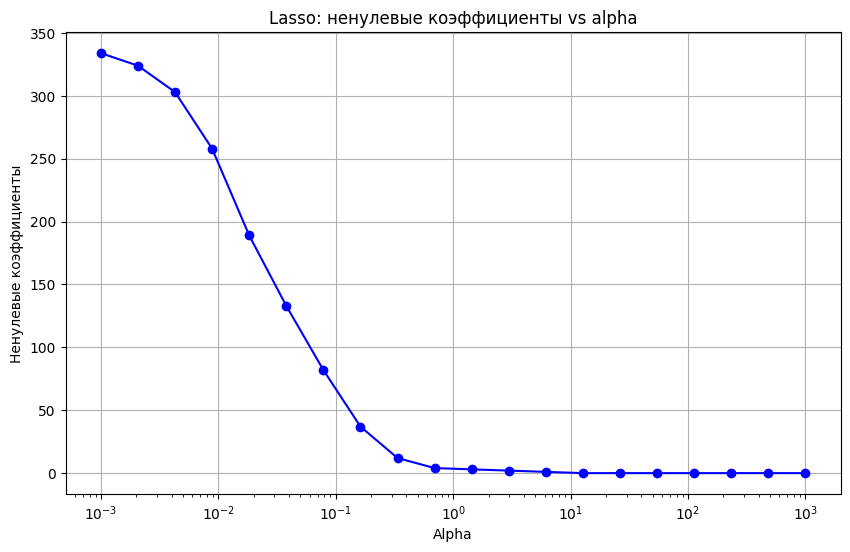

In [107]:
#18
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 20)
non_zero_counts = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train[:1000], y_train[:1000])

    non_zero = np.sum(np.abs(lasso.coef_) > 0.001)
    non_zero_counts.append(non_zero)

plt.figure(figsize=(10, 6))
plt.plot(alphas, non_zero_counts, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Ненулевые коэффициенты')
plt.title('Lasso: ненулевые коэффициенты vs alpha')
plt.grid(True)
plt.show()



In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge = Ridge().fit(X_train, y_train)
y_pred_train, y_pred_test = ridge.predict(X_train), ridge.predict(X_test)

metrics = {
    'RMSE': (np.sqrt(mean_squared_error(y_train, y_pred_train)),
             np.sqrt(mean_squared_error(y_test, y_pred_test))),
    'MAE':  (mean_absolute_error(y_train, y_pred_train),
             mean_absolute_error(y_test, y_pred_test)),
    'R2':   (r2_score(y_train, y_pred_train),
             r2_score(y_test, y_pred_test))
}

for m, (tr, te) in metrics.items():
    print(f"{m}: Train = {tr:.3f}, Test = {te:.3f}")


RMSE: Train = 33.650, Test = 34.797
MAE: Train = 17.535, Test = 17.873
R2: Train = 0.117, Test = 0.095


Лучший alpha для Ridge: 112.88378916846884
Лучший MSE (по кросс-валидации): 1015.437


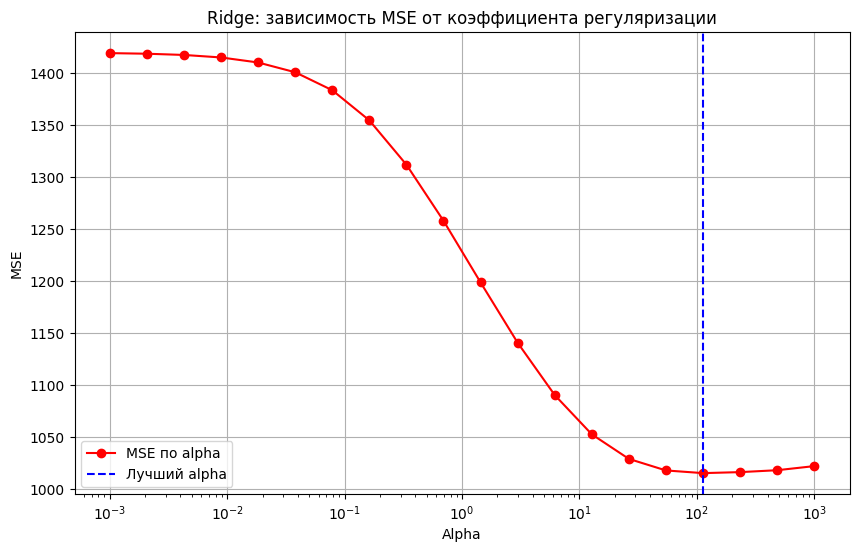

Ridge с подобранным alpha — RMSE: 35.563, MAE: 18.470, R²: 0.055


In [114]:
from sklearn.model_selection import GridSearchCV, KFold

X_sub, y_sub = X_train[:1000], y_train[:1000]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = np.logspace(-3, 3, 20)
param_grid = {'alpha': alphas}

ridge_search = GridSearchCV(
    Ridge(random_state=42),
    param_grid,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
ridge_search.fit(X_sub, y_sub)

print(f"Лучший alpha для Ridge: {ridge_search.best_params_['alpha']}")
print(f"Лучший MSE (по кросс-валидации): {-ridge_search.best_score_:.3f}")

mse_scores = -ridge_search.cv_results_['mean_test_score']
plt.figure(figsize=(10,6))
plt.semilogx(alphas, mse_scores, 'ro-', label='MSE по alpha')
plt.axvline(ridge_search.best_params_['alpha'], color='blue', linestyle='--', label='Лучший alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge: зависимость MSE от коэффициента регуляризации')
plt.grid(True)
plt.legend()
plt.show()

best_ridge = ridge_search.best_estimator_
y_pred_test = best_ridge.predict(X_test)

def calculate_metrics(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} — RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

best_ridge_metrics = calculate_metrics(y_test, y_pred_test, "Ridge с подобранным alpha")


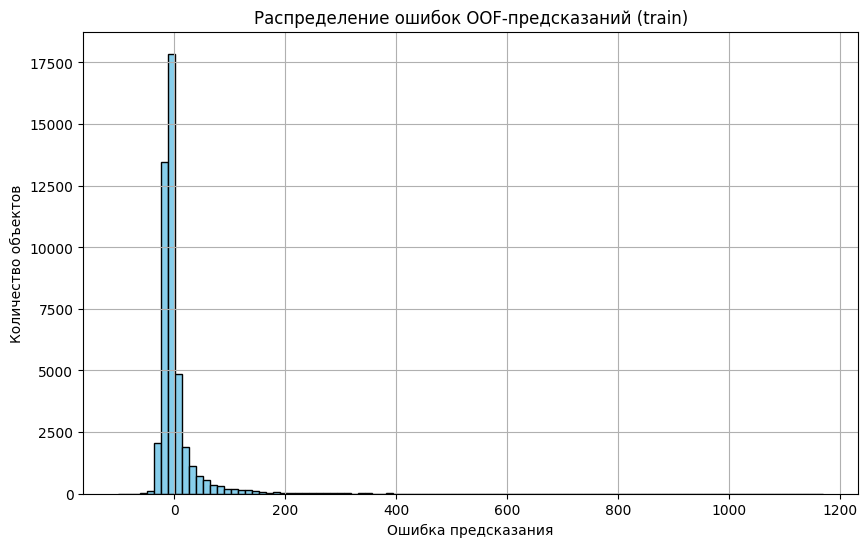

Средняя ошибка: -0.001
Стандартное отклонение ошибки: 34.003
Максимальная ошибка: 1168.630
Минимальная ошибка: -100.302


In [123]:
#19
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_model = Ridge(alpha=best_ridge.alpha, random_state=42)

y_oof_pred = cross_val_predict(ridge_model, X_train, y_train, cv=kf)

errors = y_train - y_oof_pred

plt.figure(figsize=(10,6))
plt.hist(errors, bins=100, color='skyblue', edgecolor='black')
plt.xlabel("Ошибка предсказания")
plt.ylabel("Количество объектов")
plt.title("Распределение ошибок OOF-предсказаний (train)")
plt.grid(True)
plt.show()

print(f"Средняя ошибка: {errors.mean():.3f}")
print(f"Стандартное отклонение ошибки: {errors.std():.3f}")
print(f"Максимальная ошибка: {errors.max():.3f}")
print(f"Минимальная ошибка: {errors.min():.3f}")


**Основная масса ошибок сосредоточена около нуля**

Большинство объектов модель предсказывает относительно точно, поэтому гистограмма имеет пик около 0.

Есть объекты с очень большими положительными или отрицательными ошибками — это выбросы, которые сильно влияют на MSE. Они могут быть связаны с необычными рейсами, редкими событиями (экстремальная задержка) или ошибками в данных.